<a href="https://colab.research.google.com/github/nicolas-pavon/DSP/blob/master/Entrega%202/Gaussian_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

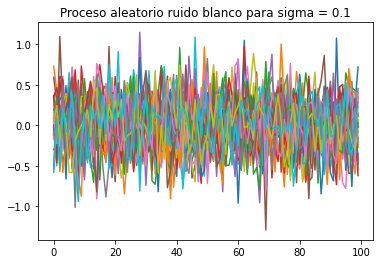

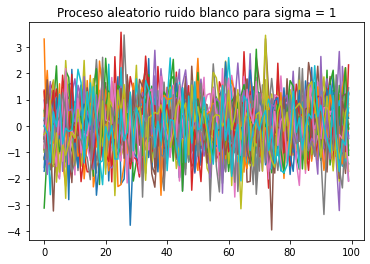

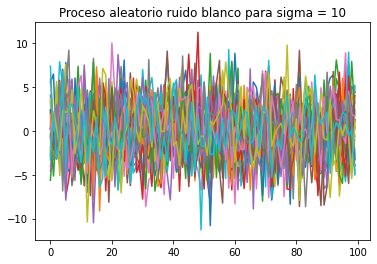

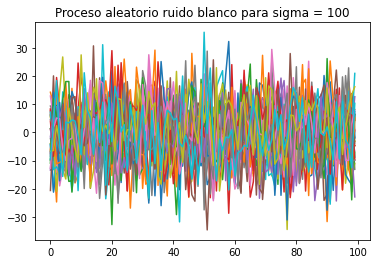

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 30
T = 100
var = [0.1, 1, 10, 100]
G_noise = []
for i in var:
  noise = np.sqrt(i)*np.random.randn(N,T)
  G_noise.append(noise)
  plt.plot(noise.T)
  plt.title('Proceso aleatorio ruido blanco para sigma = {}'.format(i))
  plt.show()


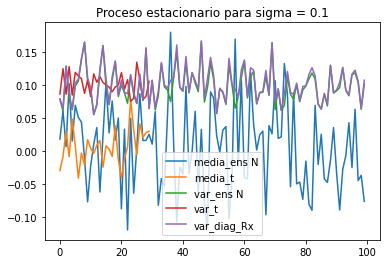

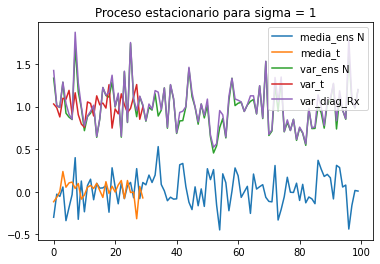

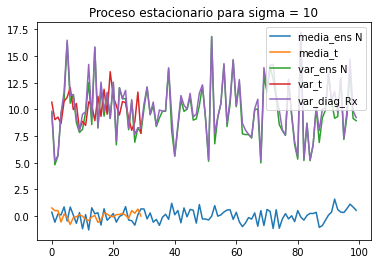

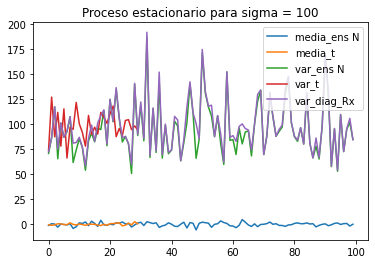

In [2]:
# Proceso estacionario en base a media, varianza y correlación
G_noise = np.array(G_noise)
R_x = []
for i in range(len(G_noise)):
  med_N = G_noise[i,:,:].mean(axis=0)
  med_t = G_noise[i,:,:].mean(axis=1)
  var_N = G_noise[i,:,:].var(axis=0)
  var_t = G_noise[i,:,:].var(axis=1)
  Rx = (1/N) * G_noise[i,:,:].T @ G_noise[i,:,:]
  R_x.append(Rx)
  

  plt.plot(med_N, label='media_ens N')
  plt.plot(med_t, label = 'media_t')
  plt.plot(var_N, label  = 'var_ens N')
  plt.plot(var_t, label = 'var_t')
  plt.plot(np.diag(Rx), label = 'var_diag_Rx')
  plt.title("Proceso estacionario para sigma = {}".format(var[i]))
  plt.legend()
  plt.show()

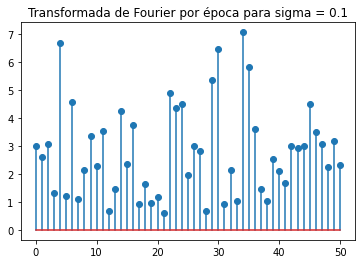

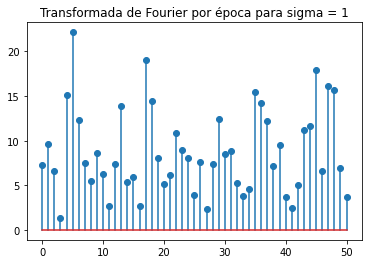

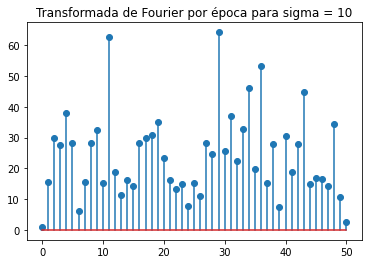

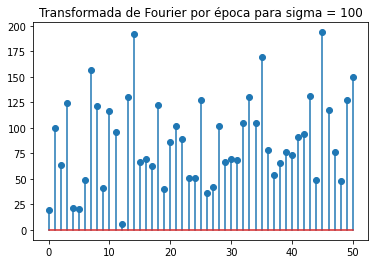

In [3]:
## hallamos la FFT para cada época
import warnings
warnings.filterwarnings('ignore')
for i in range(len(G_noise)):
  for j in range(len(G_noise[i,:,:])):
    G_noise_FFT = np.fft.rfft(G_noise[i,j,:])
  plt.stem(abs(G_noise_FFT))
  plt.title("Transformada de Fourier por época para sigma = {}".format(var[i]))
  plt.show()

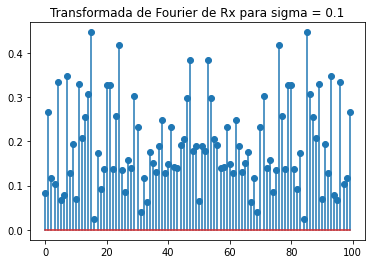

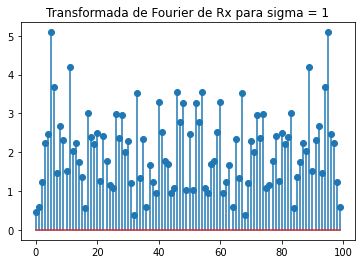

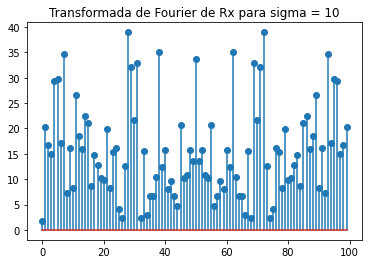

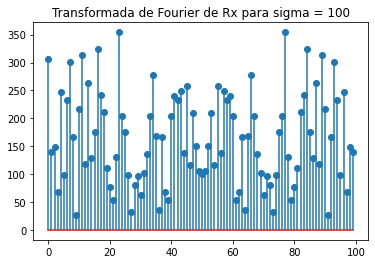

In [4]:
## Hallamos la FFT para la corelación
R_x = np.array(R_x)
for i in range(len(R_x)):
  for j in range(len(R_x[i,:,:])):
    Rx_FFT = np.fft.fft(R_x[i,j,:])
  plt.stem(abs(Rx_FFT))
  plt.title("Transformada de Fourier de Rx para sigma = {}".format(var[i]))
  plt.show()